## Demo File for ASE

This file demonstrates the avalanche analysis and prediction methods used in the paper "“Forecasting unprecedented critical events in ecological fluctuations". 

The analysis here is shown for the plankton dataset. Code to generate data for the linear response model is included in the data folder and can be loaded here for similar analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

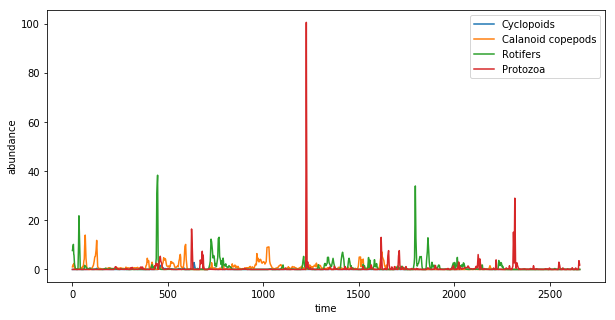

In [2]:
#Pull in Data
x=np.load('data/plankton_species.npy')
t=np.load('data/plankton_time.npy')
t=t[:,0]
names=['Cyclopoids','Calanoid copepods','Rotifers','Protozoa','Nanophytoplankton',
       'Picophytoplankton', 'Filamentous diatoms', 'Ostracods', 'Harpacticoids',
       'Bacteria']



# #Use if want to look at lin response model
# x=np.load('data/linModel.npy')
# t=np.arange(x.shape[0])
# names=['-1','-2','-3','-4'] #log10 lambda




fig=plt.figure(figsize=(10,5))
for i in range(4):
    plt.plot(t,x[:,i],label=names[i])

plt.legend()
plt.xlabel('time')
plt.ylabel('abundance')
plt.show()

## Avalanche Segmentation
-define the size anduration of avalanche events <br>
-pool by trophic level (plankton only) <br>
-confirm power law via AIC <br>

In [3]:
from functions.avalancheAnalysis import *

In [4]:
#define avalanche events
T=[]
S=[]
st=0
for i in range (x.shape[1]):
    tem1,tem2=avalancheDist_mult(x[st:,i],.1*np.mean(x[st:,i]),t[st:])  #switch to 1 times mean for everything but plankton
    T.append(tem1)
    S.append(tem2)


# #Cluster By Trophic Level
Tpl=np.append(T[4],T[5]) #photosynthetic plankton
Tpl=np.append(Tpl,T[6])
Th=np.append(T[1],T[2]) #herbivorous plankton
Th=np.append(Th,T[3])
Td=np.append(T[-1],T[-2]) #detritivores
Td=np.append(Td,T[-3])
Sh=np.append(S[1],S[2])
Sh=np.append(Sh,S[3])
Spl=np.append(S[4],S[5])
Spl=np.append(Spl,S[6])
Sd=np.append(S[-1],S[-2])
Sd=np.append(Sd,S[-3])
Tall=[]
Sall=[]
for i in range(len(T)):
    Tall=np.append(Tall,T[i])
    Sall=np.append(Sall,S[i])  
T=[Tpl,Th,Td]
S=[Spl,Sh,Sd]


(87,)
(25,)
(42,)
(82,)
(100,)
(74,)
(30,)
(79,)
(41,)
(8,)


In [5]:
from functions.confidenceTests import *

In [6]:
#Use AIC to check power law dist--DURATION
AIC_MLE=[]
AIC_THEORY=[]
alpha = []
alpha_CI = []
a=3*.95 #95% of the sampling rate (3 days for plankton)

for samp in T:
    AIC_MLE.append(powerConf(samp,a,theory=False)[0])
    AIC_THEORY.append(powerConf(samp,a,theory=1.5)[0])
    alpha.append(exponentFit_withCI(samp,a)[0][0])
    alpha_CI.append(exponentFit_withCI(samp,a)[1][0])
    
print('MLE evidence weights: ',AIC_MLE)
print('Theory evidence weights: ', AIC_THEORY)
print('Fit alpha: ', alpha)
print('Fit alpha 95%CI: ', alpha_CI)



MLE evidence weights:  [0.9999999955129957, 1.0, 1.0]
Theory evidence weights:  [0.0007397789233318658, 0.9999999999999976, 1.0]
Fit alpha:  [1.7462514962514963, 1.5956966756966757, 1.8153144753144754]
Fit alpha 95%CI:  [0.14500345790940436, 0.13939357688912374, 0.15548619249752738]


In [7]:
#Use AIC to check power law dist--Size
AIC_MLE=[]
AIC_THEORY=[]
alpha = []
alpha_CI = []
a=1 #95% of the sampling rate (3 days for plankton)

for samp in S:
    AIC_MLE.append(powerConf(samp,a,theory=False)[0])
    AIC_THEORY.append(powerConf(samp,a,theory=4/3)[0])
    alpha.append(exponentFit_withCI(samp,a)[0][0])
    alpha_CI.append(exponentFit_withCI(samp,a)[1][0])
    
print('MLE evidence weights: ',AIC_MLE)
print('Theory evidence weights: ', AIC_THEORY)
print('Fit nu: ', alpha)
print('Fit nu 95%CI: ', alpha_CI)


MLE evidence weights:  [1.0, 1.0, 1.0]
Theory evidence weights:  [1.0, 1.0, 1.0]
Fit nu:  [1.3072473172473174, 1.1477828177828178, 1.4008248808248809]
Fit nu 95%CI:  [0.07955091963568958, 0.11481622611023085, 0.18057799753206247]


## Average Avalanche Shape
Define the average avalanche trajectory from all species

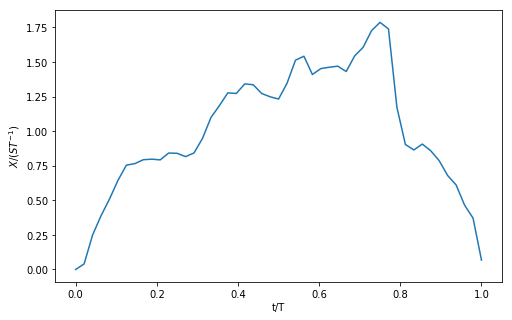

In [8]:
times=[]
vals=[]
spec=[1,2,3,4,5,6,7,8,9] #change to what species are there for other datasets
s=[4,1000]
num=50
sh=.1
CURVE = averageAvalancheShape(x,spec,s,num=num,sh=sh)

fig=plt.figure(figsize=(8,5))
plt.plot(np.linspace(0,1,CURVE.size),CURVE)
plt.xlabel('t/T')
plt.ylabel('$X/(ST^{-1})$')
plt.show()

# Predictions:

## ASE extrapolation

Method for extrapolating dynamics of severely limited data <br>
Takes a segment of historical data and extrapolates the average trajectory of arbitrarily sized fluctuations based on unversal scaling laws


In [9]:
from functions.ASE import *
normPath = 'functions/normShape.npy' #use converged form from linResponse model for average shape

/home/sam/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


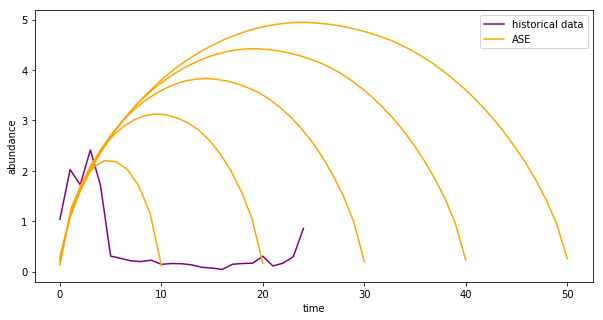

In [10]:
historical_data= x[:25,1]
Tset = np.linspace(10,50,5)
t_ASE, x_ASE = ASE(historical_data,normPath, Tset,)

fig=plt.figure(figsize=(10,5))
plt.plot(historical_data, label='historical data', color='purple')
for i in range(len(t_ASE)):
    if i==0:
        plt.plot(t_ASE[i], x_ASE[i],color='orange', label='ASE')
        continue
    plt.plot(t_ASE[i], x_ASE[i],color='orange',)
    
plt.legend()
plt.xlabel('time')
plt.ylabel('abundance')
plt.show()

## Forecasting

Random walk dynamics are consistent with neutral ecology and are a valid null model for many ecosystems. Therefore, in principle, ASE datasets can serve as training data for many forecasting algorithms. Here we apply them to s-Map, a locally weighted regression method common in the field.


In [11]:
from functions.forecasting import *

/home/sam/Desktop/AVALANCHE/DEMO/functions/forecasting.py:107: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  alpha=np.linalg.lstsq(A,b)[0]


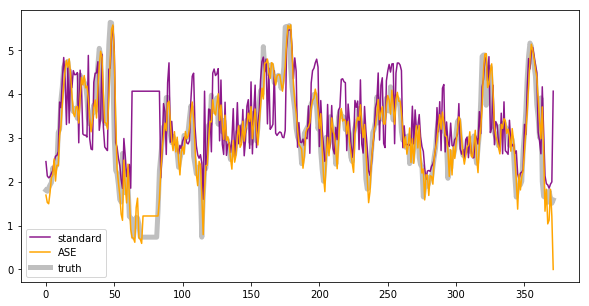

In [12]:
#s-map requires evenly spaced timepoints, so we use the iterpolated values from the original work for predictions
x_inter =np.load('data/plankton_interpolated.npy')[:400,:]
x_inter = x_inter-np.min(x_inter)

#define historical and training data sets
historical_data= x_inter[:25,1]
test_data = x_inter[25:,1] #everything outside historical data for this example, could be slow for linResponse data

#rerun ASE on the interpolated data
Tset = np.linspace(3,100,30)
t_ASE, x_ASE = ASE(historical_data,normPath, Tset,)

#Define the fitting data sets with and without ASE
train_ASE = fitSet_ASE(x_ASE)
train = fitSet(historical_data)

#Test the prediction algorithm on both training datasets
pred_ase, truth_ase = predictability(*train_ASE,test_data,m=2,tau=1,P=1,k=1,p=1,subi=1,subj=1,)
pred, truth = predictability(*train,test_data,m=2,tau=1,P=1,k=1,p=1,subi=1,subj=1,)

#Plot results
fig=plt.figure(figsize=(10,5))
plt.plot(pred, label='standard', alpha=.9, c='purple')
plt.plot(pred_ase, label='ASE', alpha=1, c='orange')
plt.plot(truth,label='truth', alpha=.5, c='grey', lw=5, zorder=-1)

plt.legend()
plt.show()

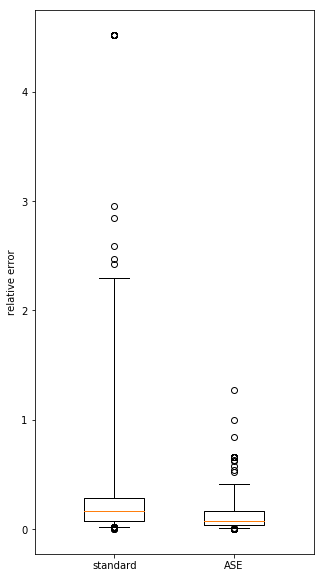

In [13]:
#plot histogram of errors
error=np.abs(pred-truth)/truth
error_ase=np.abs(pred_ase-truth)/truth

fig=plt.figure(figsize=(5,10))
plt.boxplot([error,error_ase],positions=[0,.3],whis=[5,95],)
plt.ylabel('relative error')
plt.xlim(-.2,.5)
plt.xticks([0,.3], labels=['standard','ASE'])
plt.show()

### Closing notes:
This demo file is provided as a succinct and easily readable summary of the methods and code developed for this paper. It does not contain the complete benchmarking sweeps found within the paper, though all forecasting and ASE methods are conserved throughout. To find the complete documentation please see the completeAnalysis folder at https://github.com/samuelbray32/ecologicalAvalanches